In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split 

In [2]:
data = pd.read_csv('./Aqua.csv')
data.head()

,DO,pH,Temperature,Ammonia,Nitrite Nitrogen,Carbon Dioxide,Salinity,Health
0,3.7,8.1,29,1.0,1,3.7,22.5,1
1,3.4,5.6,29,0.3,1,8.7,21.2,0
2,3.5,7.9,32,0.1,1,2.3,23.2,1
3,3.4,5.8,28,0.3,1,8.2,16.8,0
4,3.8,7.5,26,0.3,1,9.9,22.6,1


In [3]:
Y=data.iloc[:,7].values
print(Y)

[1 0 1 ... 0 0 1]


In [4]:
X=data
del data[data.columns[-1]]
X

,DO,pH,Temperature,Ammonia,Nitrite Nitrogen,Carbon Dioxide,Salinity
0,3.7,8.1,29,1.0,1,3.7,22.5
1,3.4,5.6,29,0.3,1,8.7,21.2
2,3.5,7.9,32,0.1,1,2.3,23.2
3,3.4,5.8,28,0.3,1,8.2,16.8
4,3.8,7.5,26,0.3,1,9.9,22.6
...,...,...,...,...,...,...,...
5094,5.8,10.2,30,0.4,1,8.8,17.3
5095,3.6,6.9,30,0.9,1,1.8,24.8
5096,4.5,10.2,26,0.1,1,4.4,10.2
5097,4.0,8.0,18,1.0,1,11.3,15.6


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=7)
Y

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

100.0


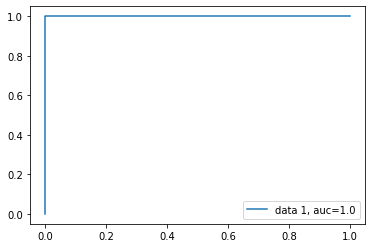

In [42]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
# from sklearn.metrics import plot_confusion_matrix
model = AdaBoostClassifier(n_estimators=99,learning_rate=1)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
ada_acc=accuracy_score(Y_test,Y_pred)*100
print(ada_acc)
# plot_confusion_matrix(model, X_test, Y_test) 

y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba[3]
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


# # Custom Input 1
# features = np.array([[200000,20993.0,41.000000,3,6.0,3,3.0,3.0,1.0,1,2,1,0.0,1,3,1.0,3,1,3]])
# Y_pred=model.predict(features)
# if(Y_pred == 1):
#     print("Person is likely to buy the package")
# else:
#     print("Person is less likely to buy the package")

# # Custom Input 2    
# features = np.array([[200001,20130.0,49.000000,1,14.0,3,4.0,4.0,2.0,0,3,1,2.0,0,3,2.0,3,2,3]])
# Y_pred=model.predict(features)
# if(Y_pred == 1):
#     print("Person is likely to buy the package")
# else:
#     print("Person is less likely to buy the package")


(3569, 7)
[0 1 1 ... 1 1 0]
76.6013071895425


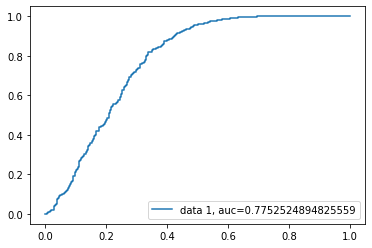

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(X_train,Y_train)
print(X_train.shape)
Y_pred=model.predict(X_test)
print(Y_pred)
Logi_acc=accuracy_score(Y_test,Y_pred)*100
print(Logi_acc)

y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba[3]
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


[1 1 0 ... 1 1 1]


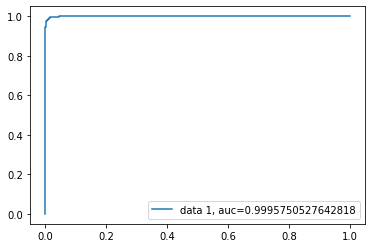

In [43]:
#Naive bayes
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(X_train,Y_train)
# print(X_test[1])
# print(X_test)
# print(X_test[0].reshape(1,-1))

Y_pred= model.predict(X_test)
print(Y_pred)
NB_acc=accuracy_score(Y_test,Y_pred)*100
NB_acc

y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba[3]
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


[1 0 1 ... 0 0 1]


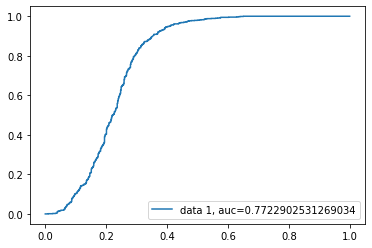

In [50]:
#SVM
from sklearn.svm import SVC
model=SVC(kernel="linear",probability=True)  #sometimes kernal= poly or "rbf"
model.fit(X_train,Y_train)
Y_pred= model.predict(X_test)
print(Y)
SVC_acc=accuracy_score(Y_test,Y_pred)*100
SVC_acc

y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba[3]
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


[1 1 0 ... 1 1 1]


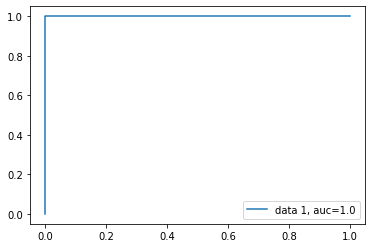

In [47]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,Y_train)
Y_pred= model.predict(X_test)
print(Y_pred)
RandFor_acc=accuracy_score(Y_test,Y_pred)*100
RandFor_acc

y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba[3]
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


[1 1 0 ... 1 1 1]


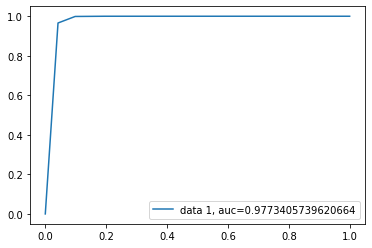

In [48]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)
print(Y_pred)
KNN_acc=accuracy_score(Y_test,Y_pred)*100
KNN_acc


y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba[3]
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


[1 1 0 ... 1 1 1]


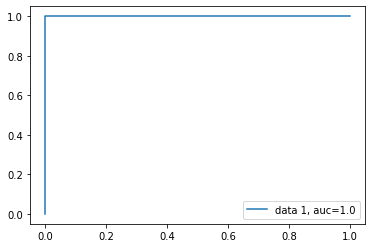

In [49]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)
Y_pred= model.predict(X_test)
print(Y_pred)
DeciTr_acc=accuracy_score(Y_test,Y_pred)*100
DeciTr_acc


y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba[3]
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


In [13]:
# all models with accuracy score

models=pd.DataFrame({'Models':['Logistic Regression','KNeighbor Classifier','GaussianNB','Supprt Vectro Machine','Random-Forest Classifier','DecisionTreeClassifier'],
                     'Accuracy score':[Logi_acc,KNN_acc,NB_acc,SVC_acc,RandFor_acc,DeciTr_acc]})
models.sort_values(by="Accuracy score",ascending=False)

,Models,Accuracy score
4,Random-Forest Classifier,100.000000
5,DecisionTreeClassifier,100.000000
2,GaussianNB,97.450980
1,KNeighbor Classifier,95.947712
3,Supprt Vectro Machine,80.261438
0,Logistic Regression,76.601307


In [14]:
# Custom Input 1
features = np.array([[3.2,6.4,30,0.2,1,3.3,12.9]])
Y_pred=model.predict(features)
if(Y_pred == 1):
    print("Health is Good!!")
else:
    print("Health is not good!!!")


Health is not good!!!


C:\Users\dhruv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [15]:
import matplotlib.pyplot as plt

In [22]:
Z=X.iloc[:,5]
Z

0        3.7
1        8.7
2        2.3
3        8.2
4        9.9
        ... 
5094     8.8
5095     1.8
5096     4.4
5097    11.3
5098     3.7
Name: Carbon Dioxide, Length: 5099, dtype: float64

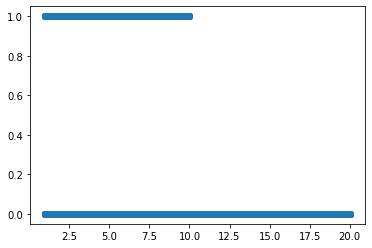

In [23]:
plt.scatter(Z, Y)

In [33]:
y_pred = model.predict_proba(X_test)[:,1]
y_pred[3]

1.0

In [39]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred)
auc = metrics.roc_auc_score(Y_test, y_pred)

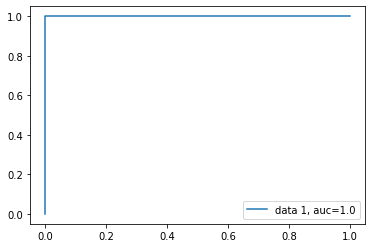

In [40]:
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()